In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Abstract Factory method dan inisiasi data yang digunakan

In [ ]:
class abstractData: 
    def show_data(self): pass
    
    def delete_data(self) :pass

In [ ]:
class earthquake_data(abstractData):
    __shared_state = dict() 
  
    # constructor method 
    def __init__(self, tableData): 
  
        self.__dict__ = self.__shared_state 
        self.tableData = tableData
  
    def show_data(self):
        return self.tableData
    
    def delete_data(self):
        self.tableData = {}
        print("Data is gone")

In [ ]:
read_data = pd.read_csv("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv")
earthquake = earthquake_data(read_data)

In [ ]:
# earthquake2.delete_data()
earthquake_show = earthquake.show_data()
earthquake_show

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-06-21T10:16:38.700Z,37.539166,-118.829002,4.59,1.32,md,18.0,232.00,0.05077,0.020,nc,nc73412991,2020-06-21T10:18:16.817Z,"13km W of Toms Place, CA",earthquake,1.22,0.81,0.110,16.0,automatic,nc,nc
1,2020-06-21T10:13:15.440Z,38.817833,-122.823334,2.36,0.61,md,13.0,83.00,0.01005,0.010,nc,nc73412986,2020-06-21T10:14:51.784Z,"7km NW of The Geysers, CA",earthquake,0.36,0.74,0.360,2.0,automatic,nc,nc
2,2020-06-21T10:12:41.550Z,33.990167,-116.939667,7.10,0.63,ml,11.0,89.00,0.10320,0.190,ci,ci39488544,2020-06-21T10:16:15.193Z,"8km NNE of Beaumont, CA",earthquake,0.65,2.19,0.299,8.0,automatic,ci,ci
3,2020-06-21T10:09:11.480Z,38.167700,-117.852500,10.10,0.90,ml,14.0,69.75,0.02600,0.080,nn,nn00751256,2020-06-21T10:16:24.129Z,"33 km SE of Mina, Nevada",earthquake,NaN,0.60,NaN,NaN,automatic,nn,nn
4,2020-06-21T09:59:53.360Z,38.822334,-122.788330,1.41,1.47,md,22.0,39.00,0.01085,0.030,nc,nc73412981,2020-06-21T10:16:18.351Z,"6km W of Cobb, CA",earthquake,0.19,0.38,0.250,4.0,automatic,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19669,2020-05-22T10:33:14.830Z,38.211300,-117.792000,10.10,1.40,ml,9.0,166.43,0.07900,0.180,nn,nn00731153,2020-05-22T10:36:56.801Z,"34 km SE of Mina, Nevada",earthquake,NaN,1.90,NaN,NaN,automatic,nn,nn
19670,2020-05-22T10:29:41.340Z,44.734167,-110.803000,2.24,0.44,ml,7.0,132.00,0.06386,0.130,uu,uu60389972,2020-05-22T16:09:50.640Z,"25 km ENE of West Yellowstone, Montana",earthquake,0.31,31.61,0.335,2.0,reviewed,uu,uu
19671,2020-05-22T10:29:26.475Z,38.136400,-117.984100,9.00,3.10,ml,24.0,42.53,0.02000,0.159,nn,nn00731147,2020-05-23T02:13:00.792Z,"30 km SSE of Mina, Nevada",earthquake,NaN,0.80,0.310,9.0,reviewed,nn,nn
19672,2020-05-22T10:26:31.600Z,38.209300,-117.711200,0.90,1.30,ml,10.0,152.35,0.06000,0.160,nn,nn00731145,2020-05-22T10:30:48.896Z,"40 km ESE of Mina, Nevada",earthquake,NaN,11.80,NaN,NaN,automatic,nn,nn


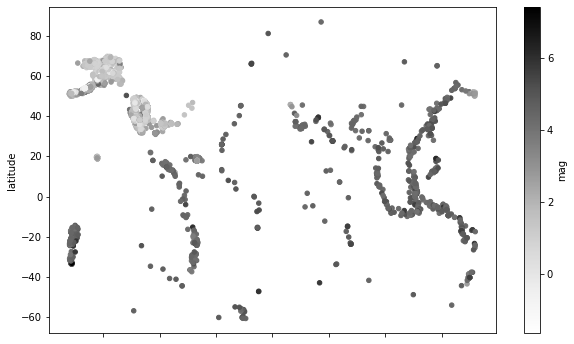

In [ ]:
earthquake_show.plot(x="longitude", y="latitude", c="mag", kind="scatter", figsize=(10,6));

## Builder pattern untuk membuat plotting data

In [ ]:
class plotting:
    def make_plot(self): pass
    
    def add_plot_data(self): pass
    
    def set_plot(self): pass
    
    def show_plot(self): pass

In [ ]:
class scatter_plot(plotting):
    def __init__(self, data):
        self.data = data
        self.make_plot()
        self.add_plot_data()
        self.set_data()
        
    def make_plot(self):
        self.fig, self.ax = plt.subplots(figsize=(20,10))
        
    def add_plot_data(self):
        self.scatter =  self.ax.scatter(x=self.data["longitude"],
                                        y=self.data["latitude"],
                                        c=self.data["mag"],
                                        cmap="Reds")
        
    def set_data(self):
        self.ax.set(title="Longitude, latitude, and mag",
               xlabel="longitude",
               ylabel="latitude");

        self.ax.legend(*self.scatter.legend_elements(), title="magnitude");
        
    def show_plot(self):
        return self.fig

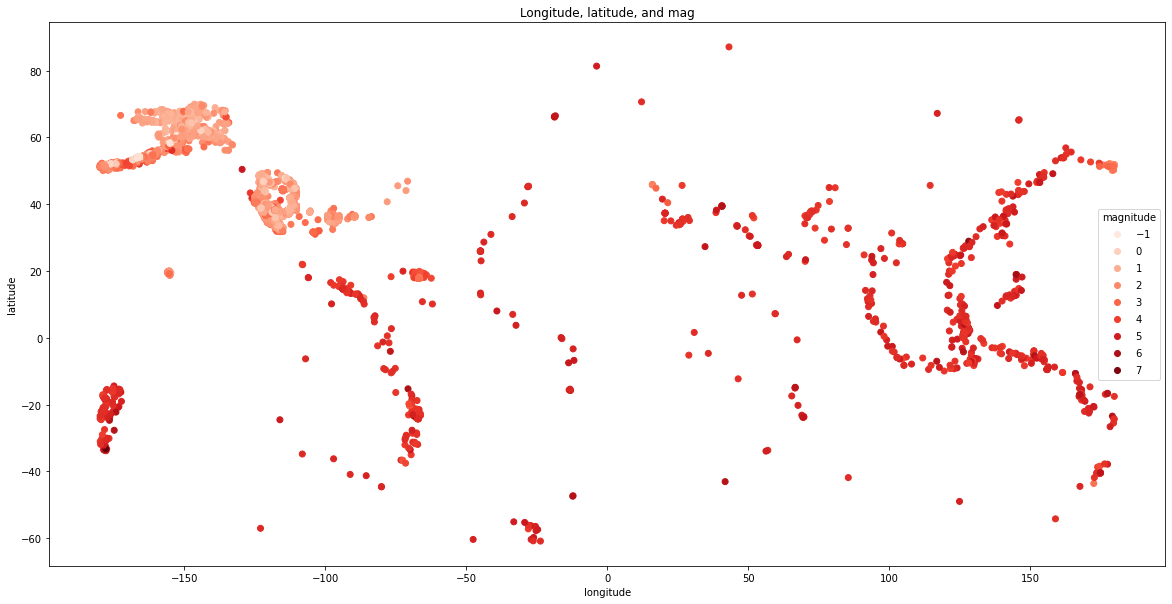

In [ ]:
scatter = scatter_plot(earthquake_show)

In [ ]:
earthquake_show.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-06-21T10:16:38.700Z,37.539166,-118.829002,4.59,1.32,md,18.0,232.00,0.05077,0.02,nc,nc73412991,2020-06-21T10:18:16.817Z,"13km W of Toms Place, CA",earthquake,1.22,0.81,0.110,16.0,automatic,nc,nc
1,2020-06-21T10:13:15.440Z,38.817833,-122.823334,2.36,0.61,md,13.0,83.00,0.01005,0.01,nc,nc73412986,2020-06-21T10:14:51.784Z,"7km NW of The Geysers, CA",earthquake,0.36,0.74,0.360,2.0,automatic,nc,nc
2,2020-06-21T10:12:41.550Z,33.990167,-116.939667,7.10,0.63,ml,11.0,89.00,0.10320,0.19,ci,ci39488544,2020-06-21T10:16:15.193Z,"8km NNE of Beaumont, CA",earthquake,0.65,2.19,0.299,8.0,automatic,ci,ci
3,2020-06-21T10:09:11.480Z,38.167700,-117.852500,10.10,0.90,ml,14.0,69.75,0.02600,0.08,nn,nn00751256,2020-06-21T10:16:24.129Z,"33 km SE of Mina, Nevada",earthquake,NaN,0.60,NaN,NaN,automatic,nn,nn
4,2020-06-21T09:59:53.360Z,38.822334,-122.788330,1.41,1.47,md,22.0,39.00,0.01085,0.03,nc,nc73412981,2020-06-21T10:16:18.351Z,"6km W of Cobb, CA",earthquake,0.19,0.38,0.250,4.0,automatic,nc,nc


In [ ]:
class histogram_plot(plotting):
    def __init__(self, data):
        self.data = data
        self.make_plot()
        self.add_plot_data()
        self.set_data()
        self.show_plot()
        
    def make_plot(self):
        self.fig, self.ax = plt.subplots(figsize=(10,8))
        
    def add_plot_data(self):
        self.hist =  self.ax.hist(self.data["mag"])
        
    def set_data(self):
        self.ax.set(title="Magnitude gempa",
                    xlabel="magnitude",
                    ylabel="frekuensi kemunculan");
        
    def show_plot(self):
        return self.fig

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


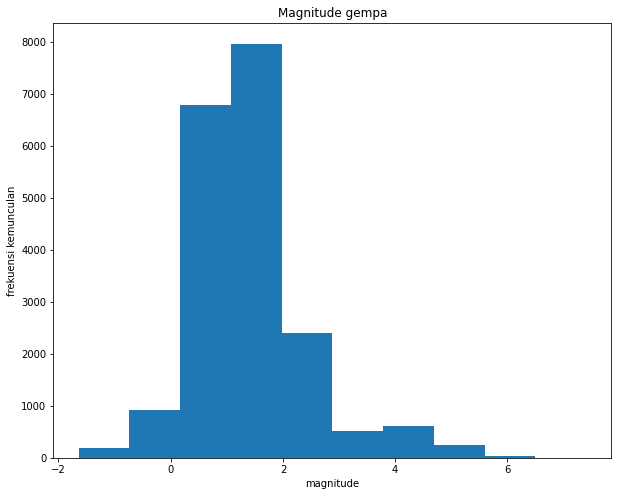

In [ ]:
histogram = histogram_plot(earthquake_show)

In [ ]:
earthquake_100 = earthquake_show.head(100)
earthquake_100

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-06-21T10:16:38.700Z,37.539166,-118.829002,4.59,1.32,md,18.0,232.00,0.05077,0.02,nc,nc73412991,2020-06-21T10:18:16.817Z,"13km W of Toms Place, CA",earthquake,1.22,0.81,0.110,16.0,automatic,nc,nc
1,2020-06-21T10:13:15.440Z,38.817833,-122.823334,2.36,0.61,md,13.0,83.00,0.01005,0.01,nc,nc73412986,2020-06-21T10:14:51.784Z,"7km NW of The Geysers, CA",earthquake,0.36,0.74,0.360,2.0,automatic,nc,nc
2,2020-06-21T10:12:41.550Z,33.990167,-116.939667,7.10,0.63,ml,11.0,89.00,0.10320,0.19,ci,ci39488544,2020-06-21T10:16:15.193Z,"8km NNE of Beaumont, CA",earthquake,0.65,2.19,0.299,8.0,automatic,ci,ci
3,2020-06-21T10:09:11.480Z,38.167700,-117.852500,10.10,0.90,ml,14.0,69.75,0.02600,0.08,nn,nn00751256,2020-06-21T10:16:24.129Z,"33 km SE of Mina, Nevada",earthquake,NaN,0.60,NaN,NaN,automatic,nn,nn
4,2020-06-21T09:59:53.360Z,38.822334,-122.788330,1.41,1.47,md,22.0,39.00,0.01085,0.03,nc,nc73412981,2020-06-21T10:16:18.351Z,"6km W of Cobb, CA",earthquake,0.19,0.38,0.250,4.0,automatic,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-06-21T05:36:58.950Z,33.870833,-116.123167,7.09,0.73,ml,14.0,94.00,0.06865,0.21,ci,ci39488304,2020-06-21T05:40:41.358Z,"19km NNE of Indio, CA",earthquake,0.45,0.97,0.151,12.0,automatic,ci,ci
96,2020-06-21T05:35:16.200Z,38.116200,-117.758200,41.30,1.20,ml,12.0,137.76,0.04800,0.07,nn,nn00751146,2020-06-21T05:40:22.154Z,"41 km NNW of Silver Peak, Nevada",earthquake,NaN,4.40,NaN,NaN,automatic,nn,nn
97,2020-06-21T05:14:56.792Z,59.832500,-152.994200,101.30,1.40,ml,NaN,NaN,NaN,0.19,ak,ak0207y71bvn,2020-06-21T05:19:58.976Z,"62 km E of Pedro Bay, Alaska",earthquake,NaN,0.60,NaN,NaN,automatic,ak,ak
98,2020-06-21T05:10:31.790Z,33.484000,-116.785500,7.12,0.36,ml,15.0,66.00,0.09062,0.15,ci,ci39488296,2020-06-21T05:14:15.167Z,"9km ENE of Aguanga, CA",earthquake,0.32,0.95,0.074,10.0,automatic,ci,ci


In [ ]:
class plot(plotting):
    def __init__(self, data):
        self.data = data
        self.make_plot()
        self.add_plot_data()
        self.set_data()
        
    def make_plot(self):
        self.fig, self.ax = plt.subplots(figsize=(30,6))
        
    def add_plot_data(self):
        self.plot =  self.ax.plot(self.data["time"], self.data["mag"],)
        
    def set_data(self):
        self.ax.set(title="Earthquake Time and Magnitude",
                    xlabel="Time",
                    ylabel="Magnitude");

        plt.draw()
        self.ax.set_xticklabels(self.ax.get_xticklabels(), rotation=45);
        self.ax.axhline(earthquake_100["mag"].mean());
        
    def show_plot(self):
        return self.fig

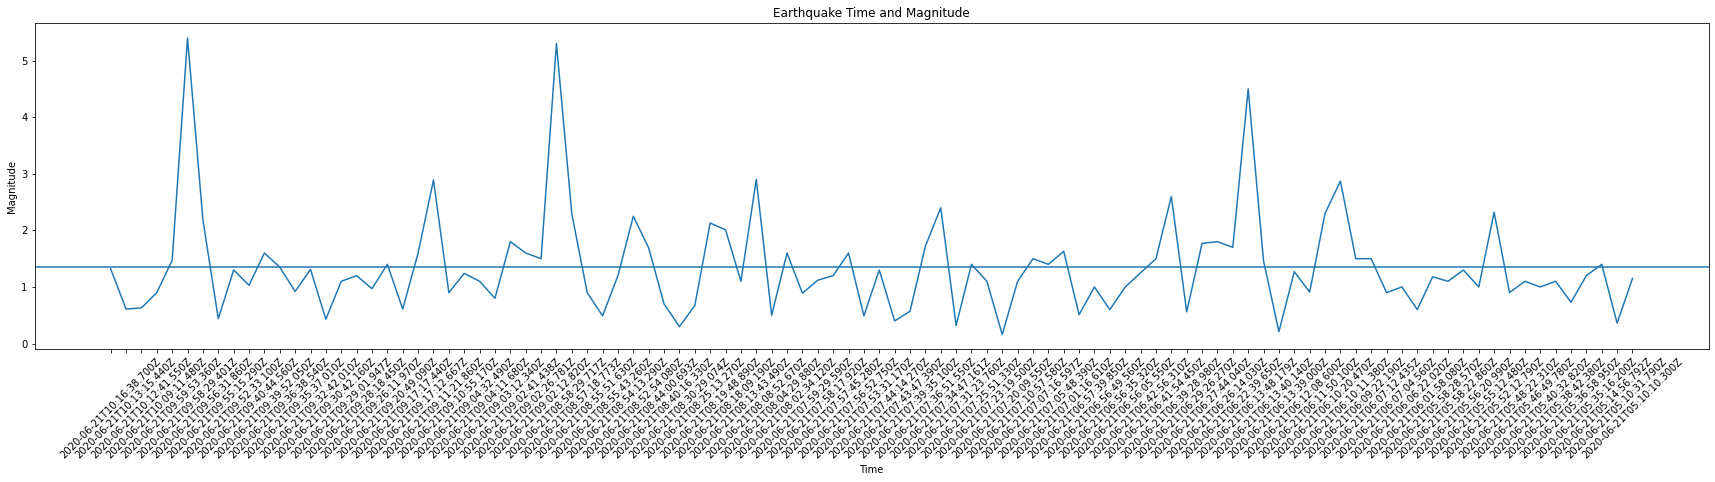

In [ ]:
plot100 = plot(earthquake_100)

In [ ]:
class scatter_plot2(plotting):
    def __init__(self, data):
        self.data = data
        self.make_plot()
        self.add_plot_data()
        self.set_data()
        
    def make_plot(self):
        self.fig, self.ax = plt.subplots(figsize=(30,6))
        
    def add_plot_data(self):
        self.scatter =  self.ax.scatter(x=self.data["place"],
                                        y=self.data["depth"],
                                        c=self.data["mag"],
                                        cmap="winter")
        
    def set_data(self):
        self.ax.set(title="Earthquake and Depth",
                    xlabel="Place",
                    ylabel="Depth")
        
        plt.draw()
        self.ax.set_xticklabels(self.ax.get_xticklabels(), rotation=45)

        self.ax.set_ylim([-5,150])
        self.ax.legend(*self.scatter.legend_elements(), title="magnitude");
        
        self.ax.axhline(earthquake_100["depth"].mean(),
           linestyle="--",
           color='r');
        
    def show_plot(self):
        return self.fig

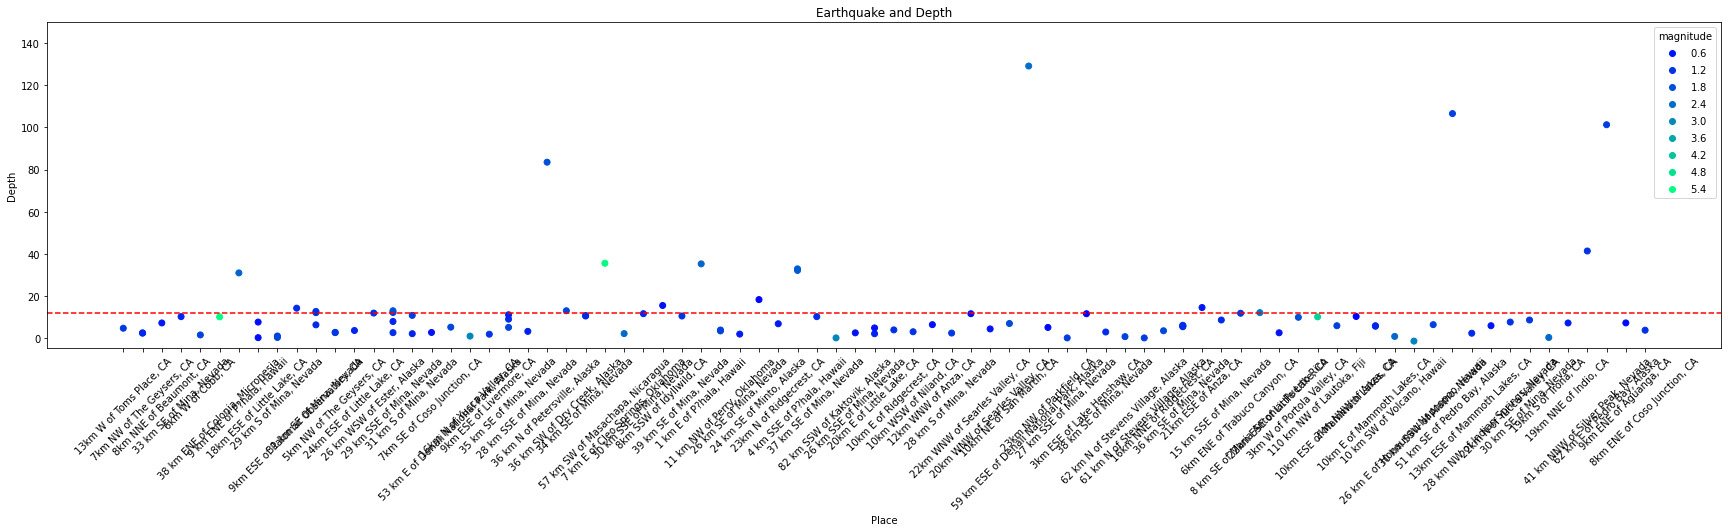

In [ ]:
scatter2 = scatter_plot2(earthquake_100)

## Chain of responbility, digunakan untuk mencari grafik yang sesuai dengan permintaan user

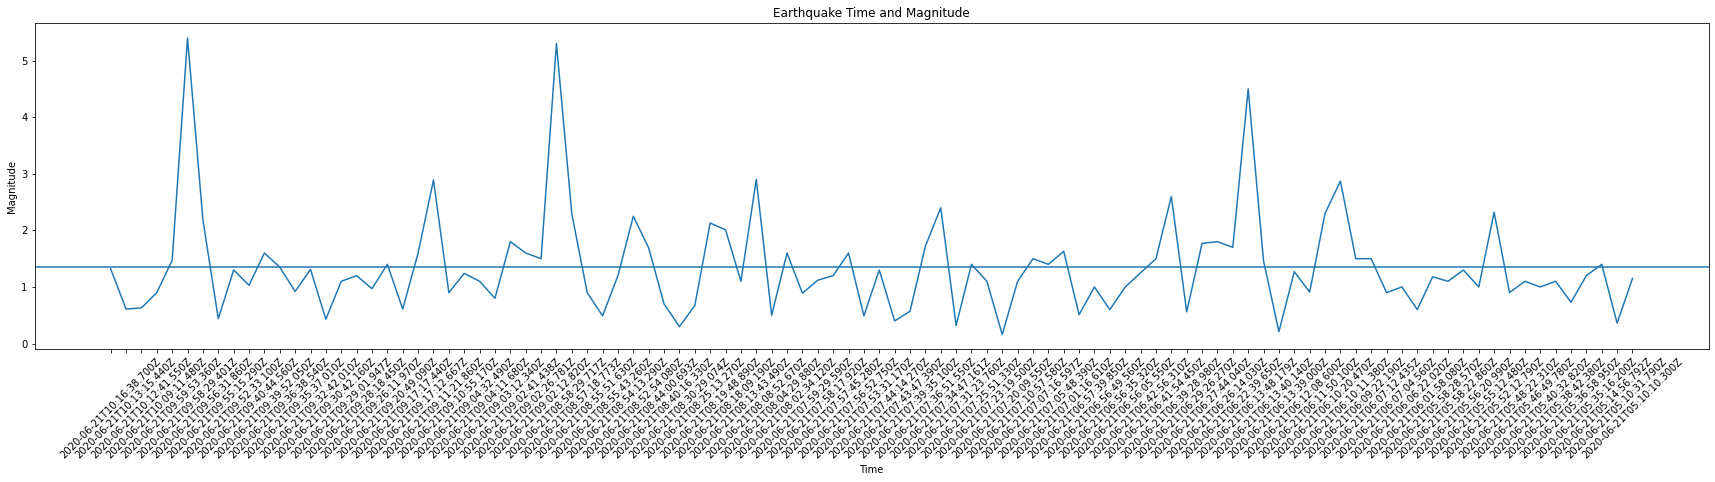

In [ ]:
class AbstractHandler(object): 
  
    """Parent class of all concrete handlers"""
  
    def __init__(self, nxt): 
  
        """change or increase the local variable using nxt"""
  
        self._nxt = nxt 
  
    def handle(self, request): 
  
        """It calls the processRequest through given request"""
  
        handled = self.processRequest(request) 
  
        """case when it is not handled"""
  
        if not handled: 
            self._nxt.handle(request) 
  
    def processRequest(self, request): 
  
        """throws a NotImplementedError"""
  
        raise NotImplementedError('First implement it !') 
  
  
class FirstConcreteHandler(AbstractHandler): 
  
    """Concrete Handler # 1: Child class of AbstractHandler""" 
    def processRequest(self, request): 
        if request == 'scatter': 
            return scatter_plot(earthquake_show)

  
  
class SecondConcreteHandler(AbstractHandler): 
  
    """Concrete Handler # 2: Child class of AbstractHandler"""
  
    def processRequest(self, request): 
        if request == "histogram": 
            return histogram_plot(earthquake_show)
        
  
class ThirdConcreteHandler(AbstractHandler): 
  
    """Concrete Handler # 3: Child class of AbstractHandler"""  
    def processRequest(self, request): 
        if request == 'plot': 
            return plot(earthquake_100)


class FourthConcreteHandler(AbstractHandler): 
  
    """Concrete Handler # 3: Child class of AbstractHandler"""
  
    def processRequest(self, request): 
        if request == 'scatter2': 
            return scatter_plot2(earthquake_100)

  
  
class DefaultHandler(AbstractHandler): 
  
    """Default Handler: child class from AbstractHandler"""
  
    def processRequest(self, request): 
  
        """Gives the message that th request is not handled and returns true"""
  
        print("This is {} telling you that request '{}' has no handler right now.".format(self.__class__.__name__, 
                                                                                          request)) 
        return True
  
  
class User: 
  
    """User Class"""
  
    def __init__(self): 
  
        """Provides the sequence of handles for the users"""
  
        initial = None
  
        self.handler = FirstConcreteHandler(SecondConcreteHandler(ThirdConcreteHandler(FourthConcreteHandler(DefaultHandler(initial))))) 
  
    def agent(self, user_request): 
  
        """Iterates over each request and sends them to specific handles"""
  
#         for request in user_request: 
        self.handler.handle(user_request) 
  
"""main method"""
  
if __name__ == "__main__": 
  
    """Create a client object"""
    user = User() 
  
    """Create requests to be processed"""
  
    string = "plot"
#     requests = list(string) 
  
    """Send the requests one by one, to handlers as per the sequence of handlers defined in the Client class"""
    user.agent(string) 

## Proxy agar user tidak mengakses langsung class yang akan digunakan

In [ ]:
class earthquake_proxy: 
    '''Relatively less resource-intensive proxy acting as middleman. 
     Instantiates a College object only if there is no fee due.'''
  
    def __init__(self):
        self.data = None
  
    def add_data(self, data):
        self.earthquake = earthquake_data(data)
    
    def show_data(self): 
        return self.earthquake.show_data()
    
    def delete_data(self):
        self.earthquake.delete_data()
    
    def show_plot(self, plot):
        self.user = User()
        self.user.agent(plot)

In [ ]:
#  Instantiate the Proxy 
proxy = earthquake_proxy()

In [ ]:
#Add Data
data = pd.read_csv("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv")
proxy.add_data(data)

In [ ]:
#Show Data
proxy.show_data().head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-06-21T10:16:38.700Z,37.539166,-118.829002,4.59,1.32,md,18.0,232.00,0.05077,0.02,nc,nc73412991,2020-06-21T10:18:16.817Z,"13km W of Toms Place, CA",earthquake,1.22,0.81,0.110,16.0,automatic,nc,nc
1,2020-06-21T10:13:15.440Z,38.817833,-122.823334,2.36,0.61,md,13.0,83.00,0.01005,0.01,nc,nc73412986,2020-06-21T10:14:51.784Z,"7km NW of The Geysers, CA",earthquake,0.36,0.74,0.360,2.0,automatic,nc,nc
2,2020-06-21T10:12:41.550Z,33.990167,-116.939667,7.10,0.63,ml,11.0,89.00,0.10320,0.19,ci,ci39488544,2020-06-21T10:16:15.193Z,"8km NNE of Beaumont, CA",earthquake,0.65,2.19,0.299,8.0,automatic,ci,ci
3,2020-06-21T10:09:11.480Z,38.167700,-117.852500,10.10,0.90,ml,14.0,69.75,0.02600,0.08,nn,nn00751256,2020-06-21T10:16:24.129Z,"33 km SE of Mina, Nevada",earthquake,NaN,0.60,NaN,NaN,automatic,nn,nn
4,2020-06-21T09:59:53.360Z,38.822334,-122.788330,1.41,1.47,md,22.0,39.00,0.01085,0.03,nc,nc73412981,2020-06-21T10:16:18.351Z,"6km W of Cobb, CA",earthquake,0.19,0.38,0.250,4.0,automatic,nc,nc


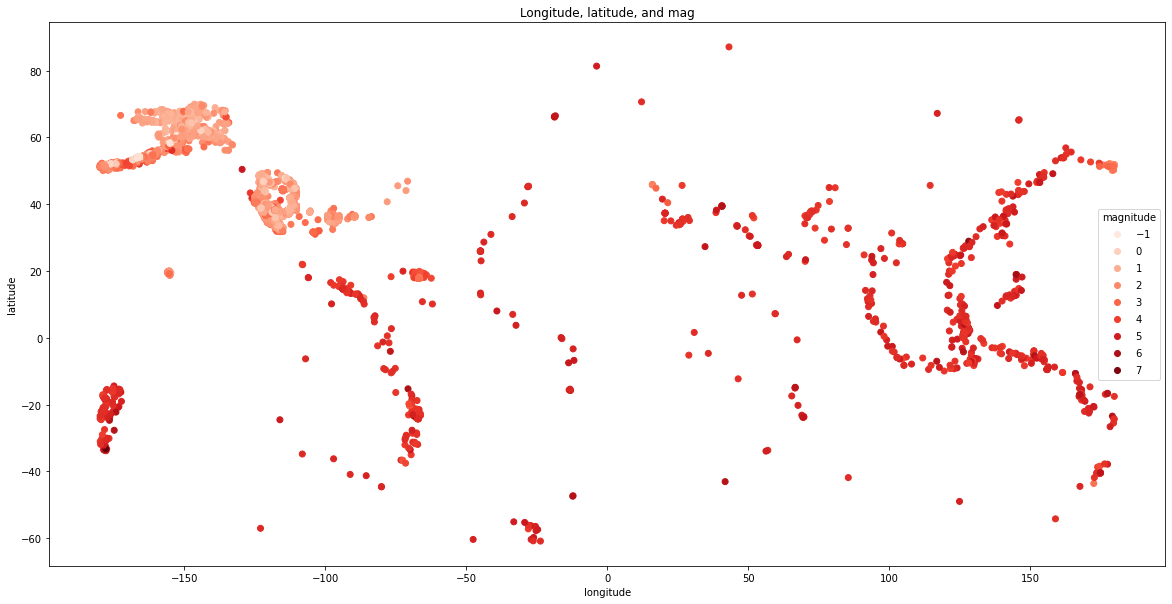

In [ ]:
#show plot
proxy.show_plot("scatter") 

In [ ]:
#delete data
proxy.delete_data()
proxy.show_data()

Data is gone


{}

In [ ]:
proxy.add_data = pd.read_csv("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv")

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


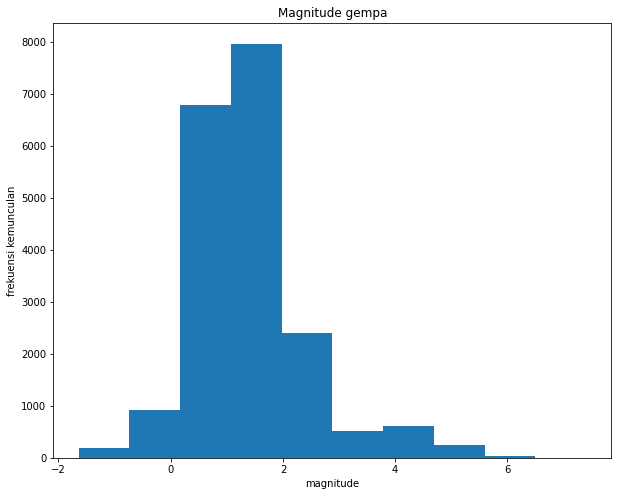

In [ ]:
proxy.show_plot("histogram")